In [2]:
import pickle
import os
import numpy as np
import pandas as pd
import scikitplot as skplt

DATA_DIR="./input/atis"

In [3]:
def load_ds(fname='atis.train.pkl'):
    with open(fname, 'rb') as stream:
        ds,dicts = pickle.load(stream)
    print('Done  loading: ', fname)
    print('      samples: {:4d}'.format(len(ds['query'])))
    print('   vocab_size: {:4d}'.format(len(dicts['token_ids'])))
    print('   slot count: {:4d}'.format(len(dicts['slot_ids'])))
    print(' intent count: {:4d}'.format(len(dicts['intent_ids'])))
    
    return ds,dicts

In [4]:
def load_atis(filename, add_start_end_token=False, verbose=True):
    train_ds, dicts = load_ds(os.path.join(DATA_DIR,filename))
    t2i, s2i, in2i = map(dicts.get, ['token_ids', 'slot_ids','intent_ids'])
    i2t, i2s, i2in = map(lambda d: {d[k]:k for k in d.keys()}, [t2i,s2i,in2i])
    query, slots, intent =  map(train_ds.get, ['query', 'slot_labels', 'intent_labels'])
    input_tensor = []
    target_tensor = []
    query_data = []
    intent_data = []
    slot_data = []
    to_show = np.random.randint(0, len(query)-1, 5)
    for i in range(len(query)):
        input_tensor.append(query[i])
        slot_text = []
        slot_vector = []
        for j in range(len(query[i])):
            slot_text.append(i2s[slots[i][j]])
            slot_vector.append(slots[i][j])
        target_tensor.append(slot_vector)
        q = ' '.join(map(i2t.get, query[i]))
        query_data.append(q.replace('BOS', '').replace('EOS',''))
        intent_data.append(i2in[intent[i][0]])
        slot = ' '.join(slot_text)
        slot_data.append(slot[1:-1])
        if i in to_show and verbose:
          print('Query text:', q)
          print('Query vector: ', query[i])
          print('Intent label: ', i2in[intent[i][0]])
          print('Slot text: ', slot)
          print('Slot vector: ', slot_vector)
          print('*'*74)

    query_data = np.array(query_data)
    intent_data = np.array(intent_data)
    slot_data = np.array(slot_data)
    intent_data_label = np.array(intent).flatten()
    return t2i, s2i, in2i, i2t, i2s, i2in, input_tensor, target_tensor, \
            query_data, intent_data, intent_data_label, slot_data

In [5]:
# load ATIS training dataset
t2i_train, s2i_train, in2i_train, i2t_train, i2s_train, i2in_train, \
input_tensor_train, target_tensor_train, \
query_data_train, intent_data_train, intent_data_label_train, slot_data_train = load_atis('atis.train.pkl')

# load ATIS testing dataset
t2i_test, s2i_test, in2i_test, i2t_test, i2s_test, i2in_test, \
input_tensor_test, target_tensor_test, \
query_data_test, intent_data_test, intent_data_label_test, slot_data_test = load_atis('atis.test.pkl')

Done  loading:  ./input/atis/atis.train.pkl
      samples: 4978
   vocab_size:  943
   slot count:  129
 intent count:   26
Query text: BOS list all united flights from boston to san francisco EOS
Query vector:  [178 549 207 887 429 444 266 851 739 440 179]
Intent label:  flight
Slot text:  O O O B-airline_name O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name O
Slot vector:  [128, 128, 128, 2, 128, 128, 48, 128, 78, 125, 128]
**************************************************************************
Query text: BOS what flights leave pittsburgh july fifth after 7 pm and arrive in san francisco EOS
Query vector:  [178 916 429 537 682 507 421 190 139 689 215 236 482 739 440 179]
Intent label:  flight
Slot text:  O O O O B-fromloc.city_name B-depart_date.month_name B-depart_date.day_number B-depart_time.time_relative B-depart_time.time I-depart_time.time O O O B-toloc.city_name I-toloc.city_name O
Slot vector:  [128, 128, 128, 128, 48, 28, 27, 36, 35, 100, 128, 128, 128, 78, 

In [6]:
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame({'query': query_data_train, 'intent': intent_data_train, 'slot filling': slot_data_train})
df_small = pd.DataFrame(columns=['query','intent','slot filling'])

In [7]:
nb_labels = len(df.intent.unique())

In [8]:
j=0
for i in df.intent.unique():
    df_small.loc[j] = df[df.intent==i].iloc[0]
    j = j + 1

In [9]:
df_small

,query,intent,slot filling
0,i want to fly from boston at 838 am and arrive in denver at 1110 in the morning,flight,O O O O O B-fromloc.city_name O B-depart_time.time I-depart_time.time O O O B-toloc.city_name O B-arrive_time.time O O B-arrive_time.period_of_day
1,what is the arrival time in san francisco for the 755 am flight leaving washington,flight_time,O O O B-flight_time I-flight_time O B-fromloc.city_name I-fromloc.city_name O O B-depart_time.time I-depart_time.time O O B-fromloc.city_name
2,cheapest airfare from tacoma to orlando,airfare,B-cost_relative O O B-fromloc.city_name O B-toloc.city_name
3,what kind of aircraft is used on a flight from cleveland to dallas,aircraft,O O O O O O O O O O B-fromloc.city_name O B-toloc.city_name
4,what kind of ground transportation is available in denver,ground_service,O O O O O O O O B-city_name
5,what 's the airport at orlando,airport,O O O O O B-city_name
6,which airline serves denver pittsburgh and atlanta,airline,O O O B-fromloc.city_name B-fromloc.city_name O B-fromloc.city_name
7,how far is it from orlando airport to orlando,distance,O O O O O B-fromloc.airport_name I-fromloc.airport_name O B-toloc.city_name
8,what is fare code h,abbreviation,O O O O B-fare_basis_code
9,how much does the limousine service cost within pittsburgh,ground_fare,O O O O B-transport_type O O O B-city_name


In [10]:
labels = intent_data_label_train

In [11]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7fd0b06a6bd0>,
 <a list of 22 Text xticklabel objects>)

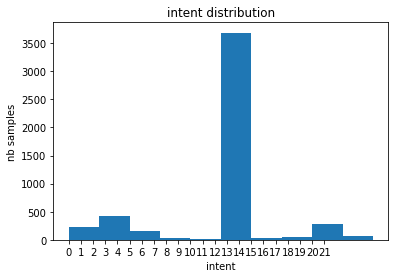

In [12]:
plt.hist(labels)
plt.xlabel('intent')
plt.ylabel('nb samples')
plt.title('intent distribution')
plt.xticks(np.arange(len(np.unique(labels))))

In [13]:
def get_vocab_size(t2i_train, t2i_test, s2i_train, s2i_test):
    vocab_in_size = len({**t2i_train, **t2i_test})
    vocab_out_size = len({**s2i_train, **s2i_test})
    return vocab_in_size, vocab_out_size

In [14]:
vocab_in_size, vocab_out_size = get_vocab_size(t2i_train, t2i_test, s2i_train, s2i_test)

In [15]:
def max_length(tensor):
    return max(len(t) for t in tensor)

In [16]:
import tensorflow as tf

In [17]:
# Helper function to pad the query tensor and slot (target) tensor to the same length. 
# Also creates a tensor for teacher forcing.
def create_tensors(input_tensor, target_tensor, nb_sample=9999999, max_len=0):
    len_input, len_target  = max_length(input_tensor), max_length(target_tensor)
    len_input = max(len_input,max_len)
    len_target = max(len_target,max_len)
    # Padding the input and output tensor to the maximum length
    input_data = tf.keras.preprocessing.sequence.pad_sequences(input_tensor, 
                                                                 maxlen=len_input,
                                                                 padding='post')

    teacher_data = tf.keras.preprocessing.sequence.pad_sequences(target_tensor, 
                                                                  maxlen=len_target , 
                                                                  padding='post')
    target_data = [[teacher_data[n][i+1] for i in range(len(teacher_data[n])-1)] for n in range(len(teacher_data))]
    target_data = tf.keras.preprocessing.sequence.pad_sequences(target_data, maxlen=len_target, padding="post")
    target_data = target_data.reshape((target_data.shape[0], target_data.shape[1], 1))
    
    nb = len(input_data)
    p = np.random.permutation(nb)
    input_data = input_data[p]
    teacher_data = teacher_data[p]
    target_data = target_data[p]
    
    return input_data[:min(nb_sample, nb)], teacher_data[:min(nb_sample, nb)], target_data[:min(nb_sample, nb)], \
           len_input, len_target 
    


In [18]:
input_data_train, teacher_data_train, target_data_train, \
                  len_input_train, len_target_train  = create_tensors(input_tensor_train, target_tensor_train)
input_data_test, teacher_data_test, target_data_test, \
                 len_input_test, len_target_test  = create_tensors(input_tensor_test, target_tensor_test, max_len=len_input_train)

In [19]:
unique_intent_values = list(in2i_train.values())

In [20]:
intent_data_label_cat_train = tf.keras.utils.to_categorical(labels, num_classes=len(unique_intent_values))

In [21]:
import numpy as np
BATCH_SIZE = 64
units = 1024
embedding_dim = 256
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.Embedding(vocab_in_size, embedding_dim, input_length=len_input_train))
model_lstm.add(tf.keras.layers.LSTM(units))
model_lstm.add(tf.keras.layers.Dense(len(unique_intent_values), activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 48, 256)           241408    
_________________________________________________________________
lstm (LSTM)                  (None, 1024)              5246976   
_________________________________________________________________
dense (Dense)                (None, 26)                26650     
Total params: 5,515,034
Trainable params: 5,515,034
Non-trainable params: 0
_________________________________________________________________


In [22]:
history_lstm = model_lstm.fit(input_data_train, intent_data_label_cat_train, 
                              epochs=10,batch_size=BATCH_SIZE)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 4978 samples
Epoch 1/10
4978/4978 [==============================] - 6s 1ms/sample - loss: 1.2434 - acc: 0.7362
Epoch 2/10
4978/4978 [==============================] - 5s 1ms/sample - loss: 1.1460 - acc: 0.7364
Epoch 3/10
4978/4978 [==============================] - 5s 1ms/sample - loss: 1.1437 - acc: 0.7364
Epoch 4/10
4978/4978 [==============================] - 5s 1ms/sample - loss: 1.1899 - acc: 0.7350
Epoch 5/10
4978/4978 [==============================] - 5s 1ms/sample - loss: 1.1443 - acc: 0.7364
Epoch 6/10
4978/4978 [==============================] - 5s 1ms/sample - loss: 1.1416 - acc: 0.7364
Epoch 7/10
4978/4978 [==============================] - 5s 1ms/sample - loss: 1.1396 - acc: 0.7364
Epoch 8/10
4978/4978 [==============================] - 5s 1ms/sample - loss: 1.1404 - acc: 0.7364
Epoch 9/10
4978/4978 [==============================] - 5s 1ms/sample - loss: 1.1384 - acc: 

In [23]:
import scikitplot as skplt

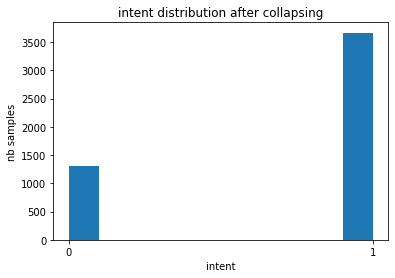

In [34]:
labels[labels==14] = -1
labels[labels!=-1] = 0
labels[labels==-1] = 1

plt.hist(labels)
plt.xlabel('intent')
plt.ylabel('nb samples')
plt.title('intent distribution after collapsing')
plt.xticks(np.arange(len(np.unique(labels))));